In [ ]:
!pip install movingpandas
!pip install hvplot
!pip install cartopy
!pip install geoviews

import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import hvplot.pandas

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts

import warnings

warnings.filterwarnings("ignore")

opts.defaults(
    opts.Overlay(active_tools=["wheel_zoom"], frame_width=500, frame_height=400)
)

mpd.show_versions()

/usr/local/lib/python3.10/dist-packages/movingpandas/__init__.py:37: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)



MovingPandas 0.19.0

SYSTEM INFO
-----------
python     : 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
executable : /usr/bin/python3
machine    : Linux-6.1.85+-x86_64-with-glibc2.35

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.9.2
GDAL data dir: /usr/local/lib/python3.10/dist-packages/fiona/gdal_data
PROJ       : 9.3.0
PROJ data dir: /usr/local/lib/python3.10/dist-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 1.0.1
pandas     : 2.1.4
fiona      : 1.10.1
numpy      : 1.26.4
shapely    : 2.0.6
pyproj     : 3.6.1
matplotlib : 3.7.1
mapclassify: None
geopy      : 2.4.1
holoviews  : 1.19.1
hvplot     : 0.10.0
geoviews   : 1.13.0
stonesoup  : None


In [ ]:
df = pd.DataFrame(
    [
        {"geometry": Point(0, 0), "t": datetime(2018, 1, 1, 12, 0, 0)},
        {"geometry": Point(6, 0), "t": datetime(2018, 1, 1, 12, 6, 0)},
        {"geometry": Point(6, 6), "t": datetime(2018, 1, 1, 12, 10, 0)},
        {"geometry": Point(9, 9), "t": datetime(2018, 1, 1, 12, 15, 0)},
    ]
).set_index("t")
gdf = GeoDataFrame(df, crs=31256)
toy_traj = mpd.Trajectory(gdf, 1)
toy_traj


Trajectory 1 (2018-01-01 12:00:00 to 2018-01-01 12:15:00) | Size: 4 | Length: 16.2m
Bounds: (0.0, 0.0, 9.0, 9.0)
LINESTRING (0 0, 6 0, 6 6, 9 9)

<Axes: >

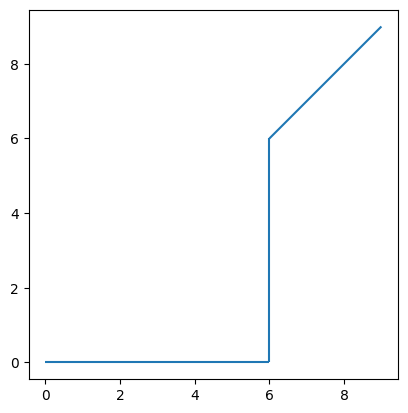

In [ ]:
toy_traj.plot()


In [ ]:
toy_traj.hvplot()


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [ ]:
toy_traj.df


geometry  traj_id
t                                        
2018-01-01 12:00:00  POINT (0 0)        1
2018-01-01 12:06:00  POINT (6 0)        1
2018-01-01 12:10:00  POINT (6 6)        1
2018-01-01 12:15:00  POINT (9 9)        1

<Axes: >

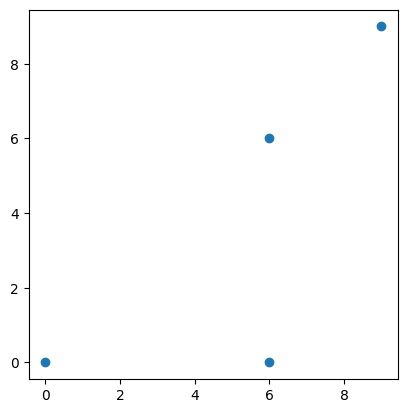

In [ ]:
toy_traj.df.plot()


In [ ]:
df = pd.read_csv("/content/demodata_geolife.csv", delimiter=";")
df

X          Y   fid    id  sequence  trajectory_id  tracker  \
0     116.391305  39.898573     1     1         1              1       19   
1     116.391317  39.898617     2     2         2              1       19   
2     116.390928  39.898613     3     3         3              1       19   
3     116.390833  39.898635     4     4         4              1       19   
4     116.389410  39.898723     5     5         5              1       19   
...          ...        ...   ...   ...       ...            ...      ...   
5903  116.337194  39.926232  6993  6993       867              5        2   
5904  116.337207  39.926237  6994  6994       868              5        2   
5905  116.337259  39.926207  6995  6995       869              5        2   
5906  116.337290  39.926201  6996  6996       870              5        2   
5907  116.337332  39.926186  6997  6997       871              5        2   

                           t  
0     2008-12-11 04:42:14+00  
1     2008-12-11 04:42:16+00  
2     2008-12-11 04:43:26+00  
3     2008-12-11 04:43:32+00  
4     2008-12-11 04:43:47+00  
...                      ...  
5903  2009-02-25 14:31:04+00  
5904  2009-02-25 14:31:09+00  
5905  2009-02-25 14:31:14+00  
5906  2009-02-25 14:31:19+00  
5907  2009-02-25 14:31:24+00  

[5908 rows x 8 columns]

In [ ]:
traj_collection = mpd.TrajectoryCollection(df, "trajectory_id", t="t", x="X", y="Y")
print(traj_collection)

TrajectoryCollection with 5 trajectories


<Axes: >

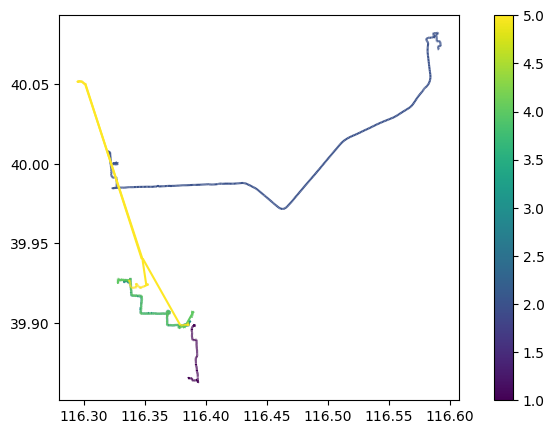

In [ ]:
traj_collection.plot(column="trajectory_id", legend=True, figsize=(9, 5))


In [ ]:
gdf = read_file("/content/demodata_geolife.gpkg")
gdf

id  sequence  trajectory_id  tracker                       t  \
0        1         1              1       19  2008-12-11 04:42:14+00   
1        2         2              1       19  2008-12-11 04:42:16+00   
2        3         3              1       19  2008-12-11 04:43:26+00   
3        4         4              1       19  2008-12-11 04:43:32+00   
4        5         5              1       19  2008-12-11 04:43:47+00   
...    ...       ...            ...      ...                     ...   
5903  6993       867              5        2  2009-02-25 14:31:04+00   
5904  6994       868              5        2  2009-02-25 14:31:09+00   
5905  6995       869              5        2  2009-02-25 14:31:14+00   
5906  6996       870              5        2  2009-02-25 14:31:19+00   
5907  6997       871              5        2  2009-02-25 14:31:24+00   

                        geometry  
0      POINT (116.3913 39.89857)  
1     POINT (116.39132 39.89862)  
2     POINT (116.39093 39.89861)  
3     POINT (116.39083 39.89864)  
4     POINT (116.38941 39.89872)  
...                          ...  
5903  POINT (116.33719 39.92623)  
5904  POINT (116.33721 39.92624)  
5905  POINT (116.33726 39.92621)  
5906   POINT (116.33729 39.9262)  
5907  POINT (116.33733 39.92619)  

[5908 rows x 6 columns]

In [ ]:
traj_collection = mpd.TrajectoryCollection(gdf, "trajectory_id", t="t")
print(traj_collection)

TrajectoryCollection with 5 trajectories


<Axes: >

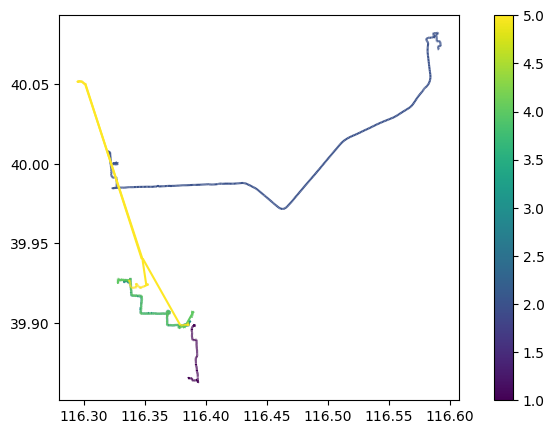

In [ ]:
traj_collection.plot(column="trajectory_id", legend=True, figsize=(9, 5))


<Axes: >

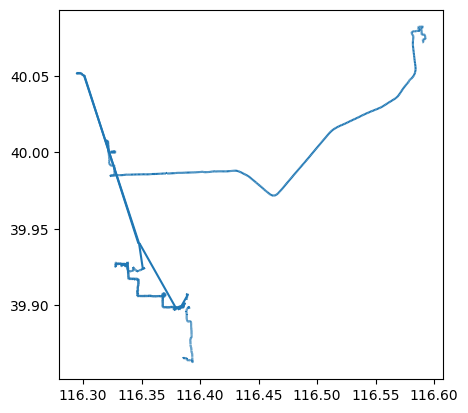

In [ ]:
traj_collection.plot()


In [ ]:
!pip install mapclassify
import folium
import matplotlib
import mapclassify

traj_collection.explore(column="trajectory_id", cmap="plasma", tiles="CartoDB positron")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
my_traj = traj_collection.trajectories[1]
print(my_traj)

Trajectory 2 (2009-06-29 07:02:25 to 2009-06-29 11:13:12) | Size: 897 | Length: 38764.6m
Bounds: (116.319212, 39.971703, 116.592616, 40.082514)
LINESTRING (116.590957 40.071961, 116.590905 40.072007, 116.590879 40.072027, 116.590915 40.072004, 


<Axes: >

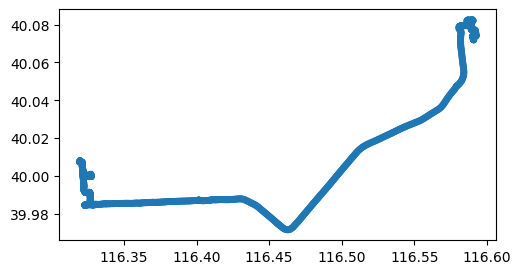

In [ ]:
my_traj.plot(linewidth=5, capstyle="round", figsize=(9, 3))


In [ ]:
my_traj.hvplot(line_width=7.0, tiles="OSM")


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [ ]:
my_traj.explore(tiles="CartoDB positron", style_kwds={"weight": 4})


In [ ]:
df = pd.DataFrame(
    {
        "t": pd.date_range("2020-01-01", periods=5, freq="min"),
        "trajectory_id": [1, 1, 2, 2, 2],
        "geometry": [Point(0, 0), Point(0, 1), Point(1, 2), Point(1, 3), Point(2, 4)],
    }
)
gdf = gpd.GeoDataFrame(df, crs=4326)
tc = mpd.TrajectoryCollection(gdf, traj_id_col="trajectory_id", t="t")
tc

TrajectoryCollection with 2 trajectories

In [ ]:
tc.hvplot()


:Overlay
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .Path.I    :Path   [Longitude,Latitude]
   .Path.II   :Path   [Longitude,Latitude]
   .Points.I  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II :Points   [Longitude,Latitude]   (triangle_angle)

In [ ]:
min_duration = timedelta(minutes=1)
tc.trajectories = [traj for traj in tc if traj.get_duration() > min_duration]
tc


TrajectoryCollection with 1 trajectories